# <center> PROCESAMIENTO DIGITAL DE SEÑALES DE AUDIO</center>
## <center> Procesamiento en tiempo corto</center>      

In [4]:
%matplotlib inline

import math
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
from scipy.io import wavfile

import IPython.display as ipd

**NOTA:** *Las siguientes dos celdas solo son necesarias para descargar el archivo de ejemplo. Ignórelas si va a trabajar con sus propios archivos de audio.*

In [2]:
!pip install wget

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=b9b339aacf959c07f7ae1208df795a0f33027259326347834e3cc7449b1f17f9
  Stored in directory: /Users/fbello/Library/Caches/pip/wheels/01/46/3b/e29ffbe4ebe614ff224bad40fc6a5773a67a163251585a13a9
Successfully built wget


In [3]:
import wget

### Descripción

Este ejercicio busca ser una introducción al **procesamiento de señales en tiempo corto**.

La tarea planteada consiste en obtener un **contorno de la forma de onda** de la señal a través de calcular el **máximo** de la señal en tramas (*frames*) de tiempo corto. Una posible utilidad de este procesamiento es representar la forma de onda con menos muestras y se utiliza en aplicaciones de edición o visualización de audio para disminuir los recursos de cómputo requeridos por la interfaz gráfica y de modo que responda más rápidamente. 

### Cómo correr el notebook
Se puede bajar y correr el notebook de forma local en una computadora.

O también se puede correr en Google Colab usando el siguiente enlace. 

<table align="center">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/emidan19/audio-dsp/blob/main/notebooks/audioDSP-short_time_example.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

### Obtener un archivo

La siguiente celda descarga el archivo de audio de ejemplo.

In [5]:
# download audio file to use
wget.download('https://github.com/emidan19/audio-dsp/blob/main/audio/el_sol_brillo_calurosamente.wav?raw=true')

'el_sol_brillo_calurosamente.wav'

A continuación se carga el archivo de audio y puede reproducirse.

In [6]:
# load audio file from local path
sr, data = wavfile.read('./el_sol_brillo_calurosamente.wav')

# normalize maximum (absolute) amplitude
data = data / np.max(abs(data)) * 0.9

# play audio
ipd.Audio(data, rate=sr)

La siguiente celda grafica la forma de onda.

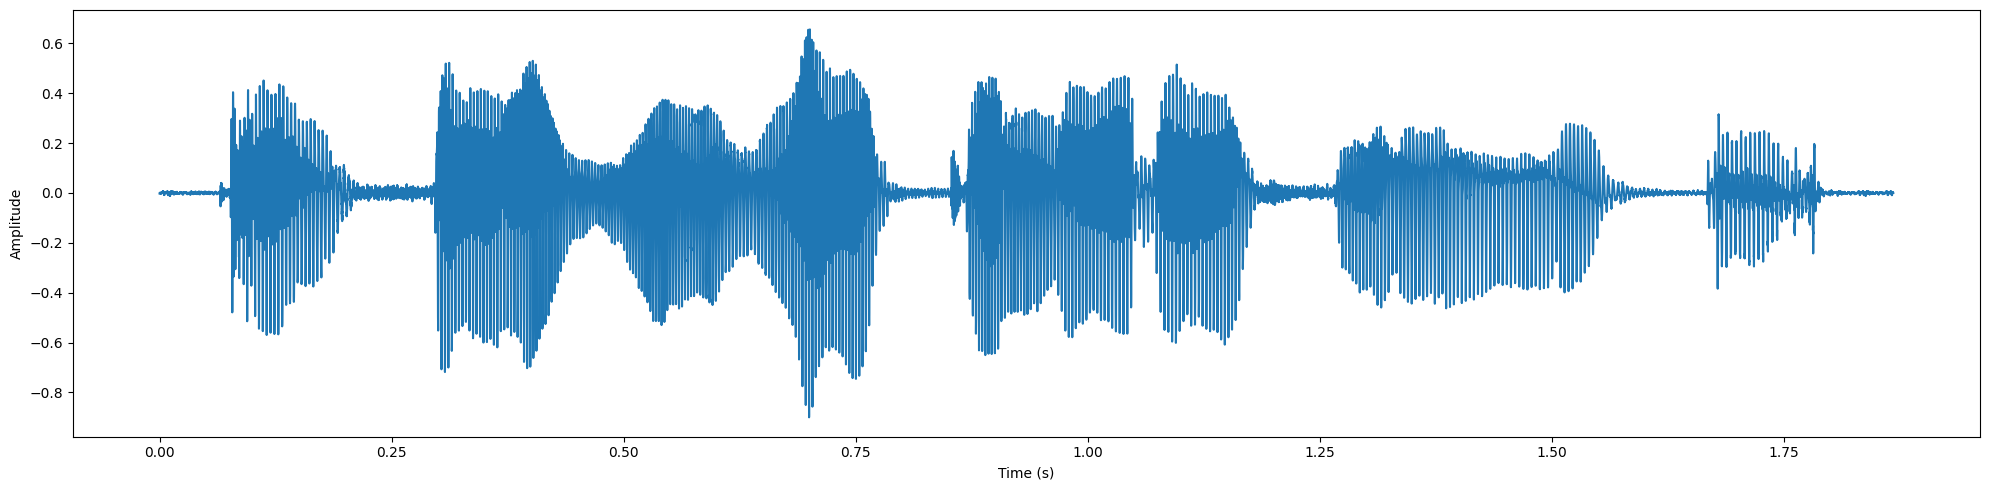

In [7]:
# signal length in samples
L = data.shape[0]

# time stamps for audio samples
t = np.linspace(0, L / sr, L)

plt.figure(figsize=(20,5))
plt.plot(t, data)
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.tight_layout()

### Procesamiento en tiempo corto
La siguiente función calcula el máximo de la forma de onda en tramas (o ventanas) de tiempo corto. 

Complete el código que se proporciona a continuación teniendo en cuenta lo siguiente.

  1. El largo de ventana y el salto en muestras deben convertirse a un número entero de muestras.
  2. Al calcular la cantidad de tramas totales a procesar trate de utilizar la mayor cantidad de señal posible.
  3. La frecuencia de muestreo de la señal resultante está dada por el salto entre ventanas.
  4. Cuando se obtiene cada trama tenga presente cómo se indexa un array respecto a la inclusión del último valor.
  5. El cálculo del máximo es respecto al valor absoluto de la señal en la trama.


In [8]:
def max_short_time(x, fs, win_size, hop_size):
    """
    Computes maximum values of short-time frames of the audio waveform.

    Parameters
    ----------
    x (numpy array)  : input audio waveform
    fs (int)         : sampling frequency in Hz
    win_size (float) : frame size in seconds
    hop_size (float) : hop size in seconds

    Returns
    -------
    y (numpy array) : output signal
    t (numpy array) : time instants

    """

    # signal length in samples
    L = x.shape[0]
    # window size in samples
    win_samp = round(win_size*fs)
    # hop size in samples
    hop_samp = round(hop_size*fs)

    # number of frames to process
    num_frames = int((L-win_samp)/hop_samp)

    # empty array for the output signal
    y = np.zeros(num_frames)

    # sampling frequency of the resulting signal
    fs_y = round(1/hop_size)

    # time stamps for the resulting signal samples
    t = np.linspace(0, L / sr, num_frames)

    # compute maximum value for each signal frame
    for i in range(num_frames):

        # frame's initial index
        ind_ini = i*hop_samp

        # frame's ending index
        ind_end = ind_ini + win_samp

        # signal frame
        frame = x[ind_ini:ind_end]

        # maximum (absolute) value in the frame
        y[i] = np.max(abs(frame))

    return y, t

### Aplicar la funcion implementada

Una vez implementada la función ejecute el siguiente código para calcular el contorno de la forma de onda a través del máximo de tiempo corto. 

A continuación realice lo siguiente:
  1. Analice el efecto del largo de la ventana en la representación obtenida.
  2. Analice el efecto del salto entre ventanas en la representación obtenida.
  3. ¿Qué valores considera que son adecuados para cada uno de dichos parámetros?

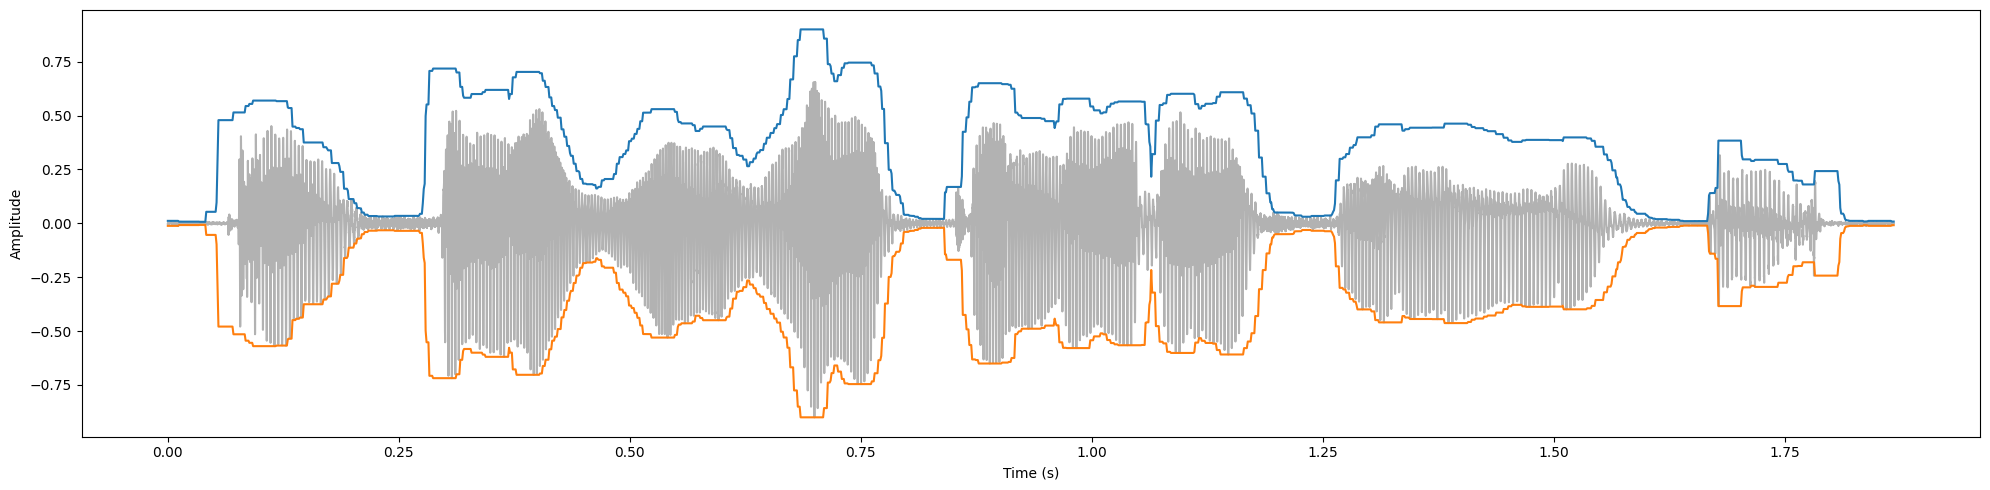

In [9]:
WIN_SIZE = 0.025
HOP_SIZE = 0.001

# compute short-time maximum signal of the audio waveform
max_amp, t_max = max_short_time(data, sr, WIN_SIZE, HOP_SIZE)


# plot short-time maximum and audio waveform
plt.figure(figsize=(20,5))
plt.plot(t, data, 'k', alpha=0.3)
plt.plot(t_max, max_amp)
plt.plot(t_max, -max_amp)
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.tight_layout()

### Ventana suavizante

En la función implementada anteriormente no se usa una ventana suavizante explícitamente, lo que corresponde a usar una ventana rectangular. 

En la siguiente celda se genera una ventana suavizante de un tipo determinado (e.g. *Hann*, *Hamming*) y de cierto largo. 

A continuación realice lo siguiente:

  1. Estudie la documentación de `scipy.signal` para ver los tipos de ventana que es posible generar. Pruebe generando diferentes ventanas.
  2. Modifique la función de procesamiento en tiempo corto para que se pueda usar cualquier tipo de ventana suavizante.
  3. Analice el efecto del tipo de ventana en la representación obtenida. En particular compare una ventana *rectangular* con una ventana tipo *Han*.

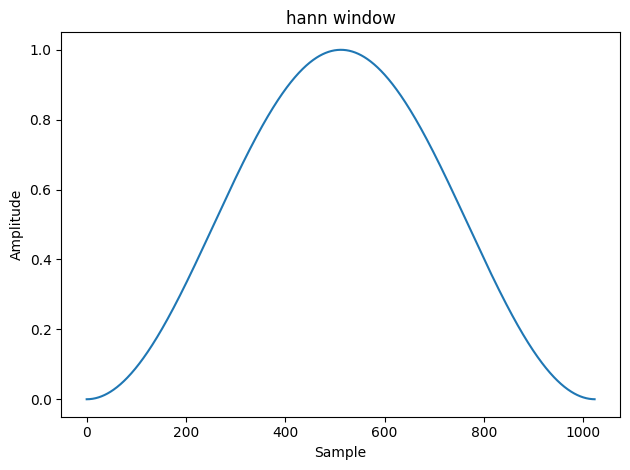

In [10]:
window_type = 'hann'
window_length = 1024

window = signal.windows.get_window(window_type, window_length)

plt.plot(window)
plt.title(window_type + " window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.tight_layout()